Theoretical Options Trading Strategy

In [2]:
# Libraries

import numpy as np 
from scipy.stats import norm 
import matplotlib.pyplot as plt
import qfin as qf

In [3]:
# Set option parameters 

S = 100                 
K = 105
vol = 0.15
r = 0.05
T = 1
N = 252
dt = T / N

We compute the price of a call option by solving the Black-Scholes equation :

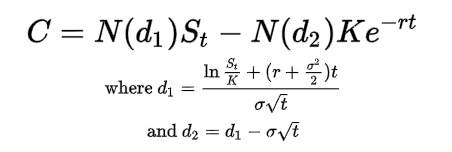

In [5]:
# Call price computation

def call_price(S, K, T, r, vol):
    d1 = (np.log(S / K) + (r + vol ** 2 / 2) * T) / (vol * np.sqrt(T))  
    d2 = d1 - vol * np.sqrt(T)  
    call_price = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    return call_price

We set the movement of the underlying asset as a Geometric Brownian Motion.

The motion follows this process :

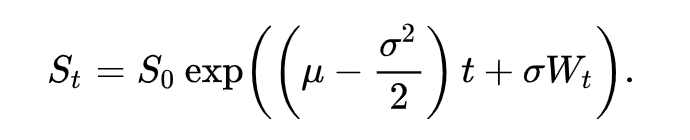

In [6]:
# Simulating potential path of the underlying asset (Geometric Brownian Motion)

def Geometric_Brownian_Motion(S, r, vol, T, dt, N_paths) : 
    N_steps = int(T / dt) 
    t = np.linspace(0, N_steps, N_steps) 
    Si = np.zeros((N_paths, N_steps)) 
    Si[:,0] = S 
    
    for i in range(1, N_steps) : 
        Z = np.random.normal(0,1,N_paths) 
        Si[:, i] = Si[:, i-1] * np.exp((r - 0.5 * vol ** 2) * dt + vol * np.sqrt(dt) * Z) 
        
    return t, Si 

Below, we plot a potential path of such a call option :

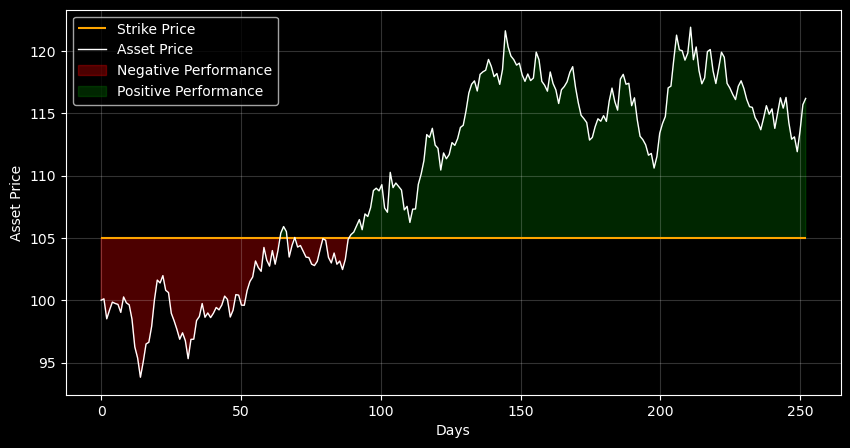

In [36]:
# Running the simulation of the price path

N_paths = 1
t, Si = Geometric_Brownian_Motion(S, r, vol, T, dt, N_paths)

# Plotting the path

plt.style.use('dark_background')
plt.figure(figsize = (10, 5))
plt.hlines(105,0,252, label = 'Strike Price', color = 'orange')
plt.xlabel('Days')
plt.ylabel('Asset Price')


for i in range(N_paths) :
    plt.plot(t, Si[i,:], linewidth = 1, color = 'white', label = 'Asset Price')
    
plt.fill_between(t, Si[i, :], 105, where=(Si[i, :] < 105), color='red', alpha=0.3, label = 'Negative Performance') 
plt.fill_between(t, Si[i, :], 105, where=(Si[i, :] > 105), color='green', alpha=0.3, label = 'Positive Performance')
plt.grid(alpha = 0.2, zorder = 0)
plt.legend()
plt.show()

Here, we assume that the market is pricing the option $0.2 below the Black-Scholes price

In [24]:
# Trading Strategy : 

print('Model Price is : ', round(call_price(S, K, T, r, vol), 2))
print('Market Price is : ', round(call_price(S, K, T, r, vol),2) - 0.2)
print('Market Discrepancy is : ', 0.2)

Model Price is :  6.04
Market Price is :  5.84
Market Discrepancy is :  0.2


In [38]:
# Computing the P&L of buying 100 such options N times

premium = 5.84 * 100
pnls = []

for i in range(100000):  # Define N number of simulations
    _, Si = Geometric_Brownian_Motion(S, r, vol, T, dt, N_paths)  # Simulate N paths
    
    final_price = Si[:, -1]  # Get the final stock price for each path
    option_payout = np.maximum(final_price - K, 0) * 100   # Call option payoff (max(ST - K, 0) * 100 contracts)
    
    pnl = option_payout - premium  # Profit/Loss calculation
    pnls.append(pnl)

expected_pnl = np.mean(pnls)
print("Expected P&L:", expected_pnl) 
if expected_pnl > 0 :
    print("Strategy has a positive expectancy")

Expected P&L: 47.756762492257046
Strategy has a positive expectancy


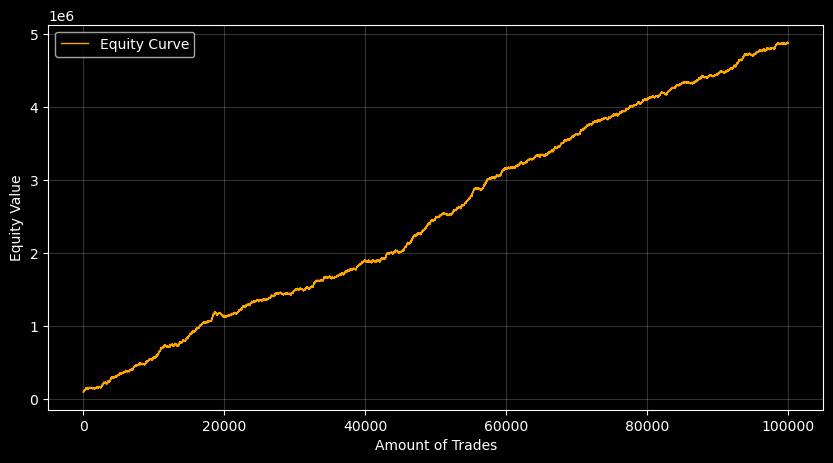

In [39]:
# Plotting the strategy's equity curve

equity = 100000 + np.cumsum(pnls)
plt.figure(figsize = (10,5))
plt.plot(equity, linewidth = 1, color = 'orange', label = 'Equity Curve')
plt.xlabel('Amount of Trades')
plt.ylabel('Equity Value')
plt.grid(alpha = 0.2, zorder = 0)
plt.legend()
plt.show()

This strategy is built on theoretical assumptions like the Black-Scholes model and Geometric Brownian Motion. In reality, markets are much more complex, with many factors making this strategy unapplicable.

In reality, although it is common to find call-options priced below their Black-Scholes price, this discrepancy is justified by lower implied volatility, dividends, liquidity or other factors.